In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the Zoo dataset
data = pd.read_csv('Zoo.csv')  # Replace with the correct file path



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
             hair 

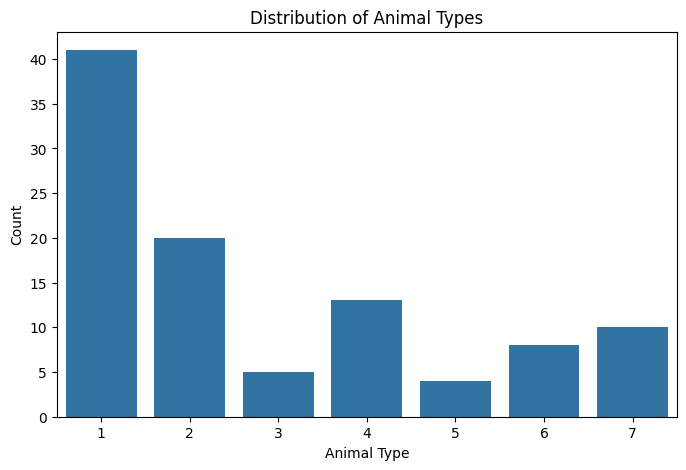

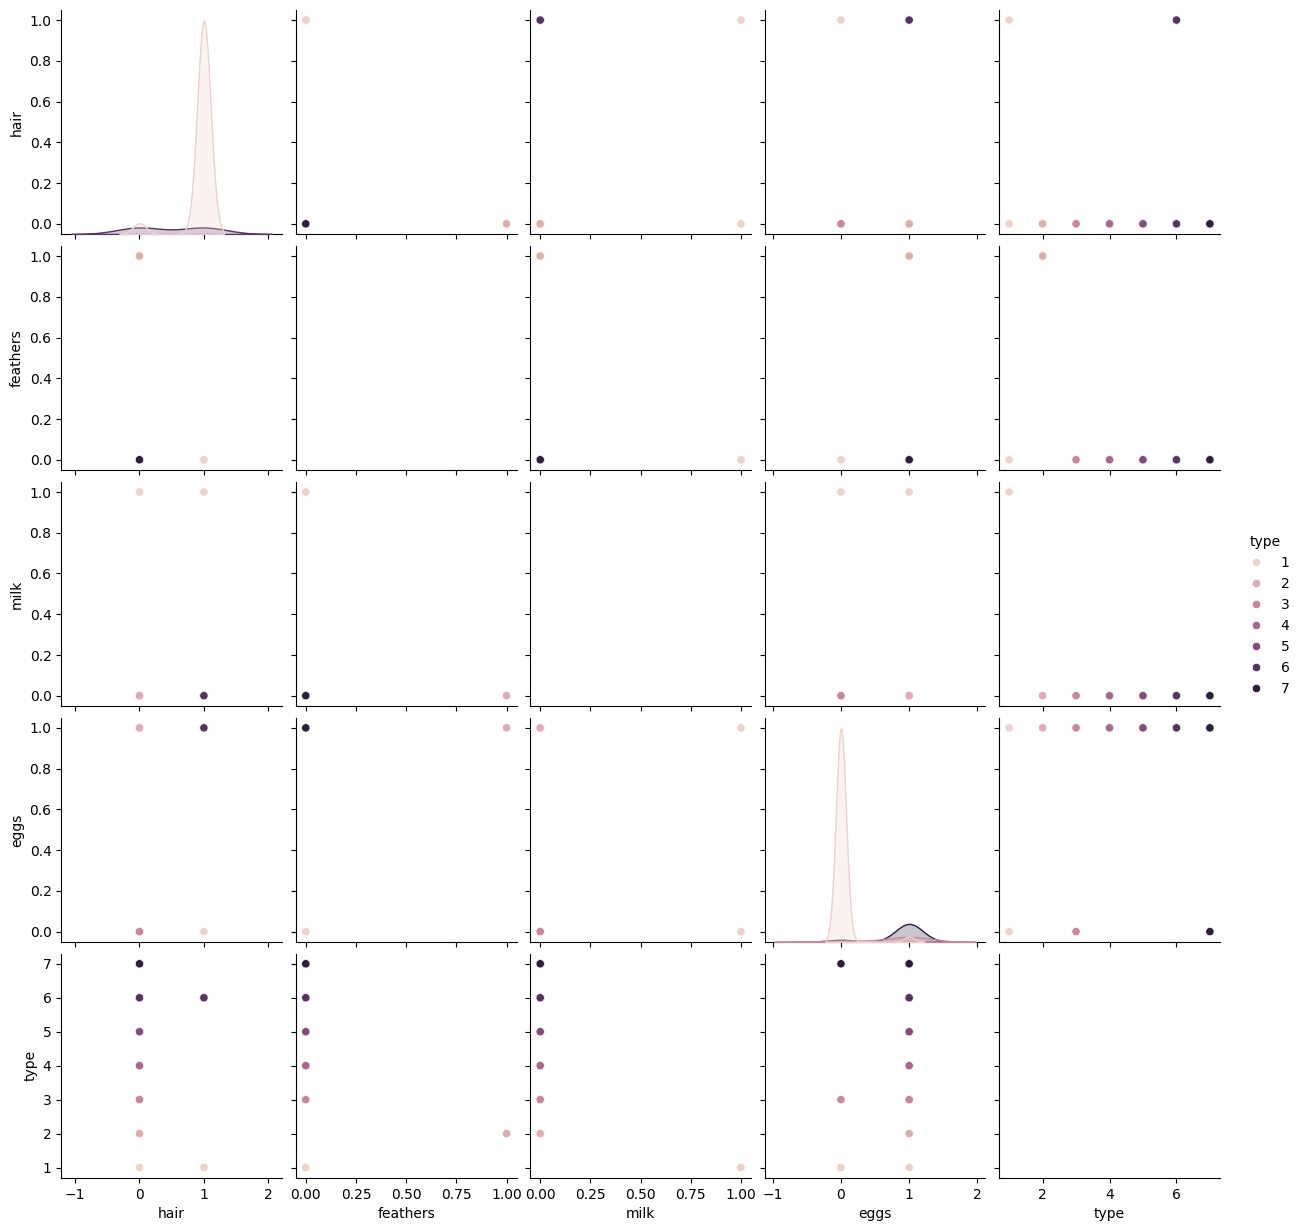

In [3]:
# Task 1: Analyze the data using visualizations
print(data.info())
print(data.describe())

# Visualize the distribution of the 'type' column
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=data)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

# Visualize pair plots for selected features
sns.pairplot(data, vars=['hair', 'feathers', 'milk', 'eggs', 'type'], hue='type')
plt.show()


Missing values:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


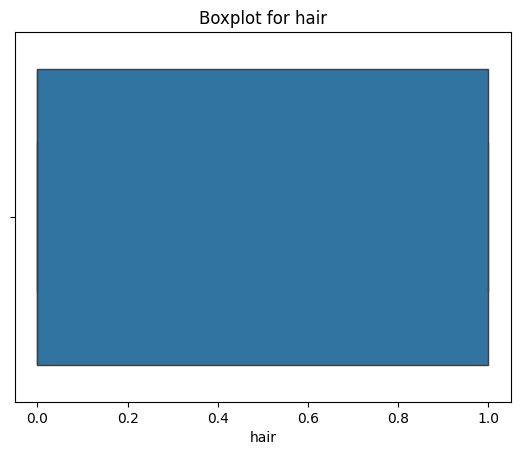

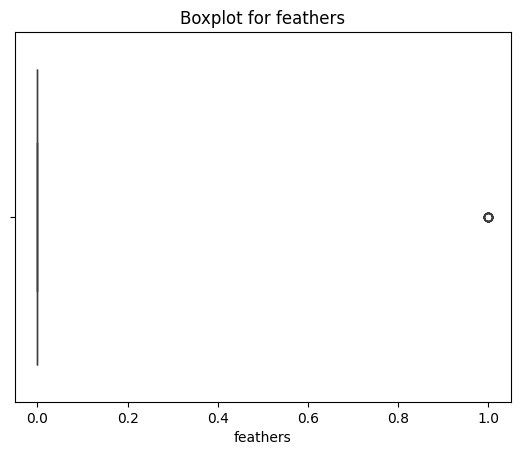

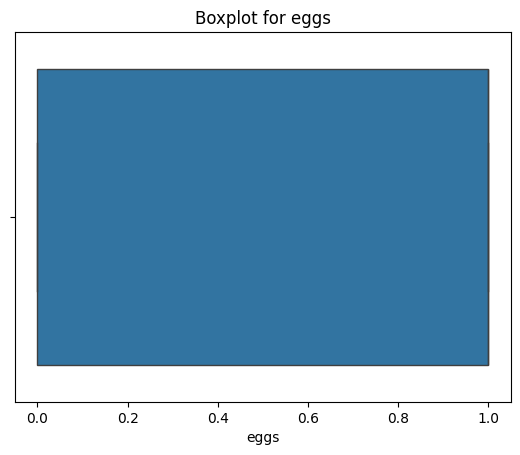

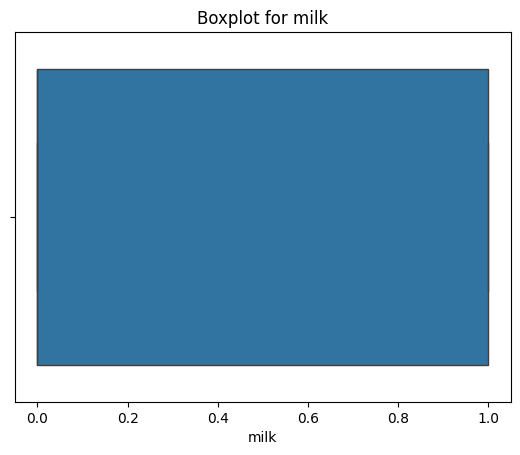

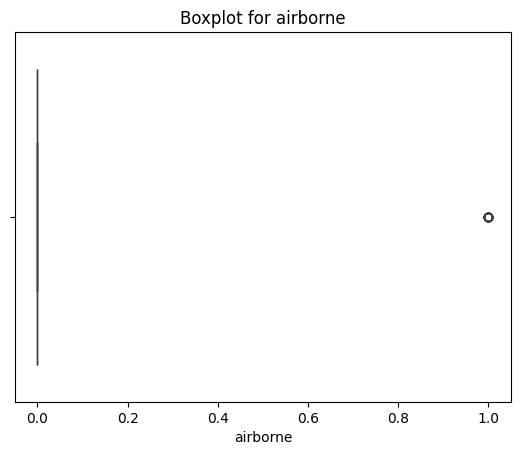

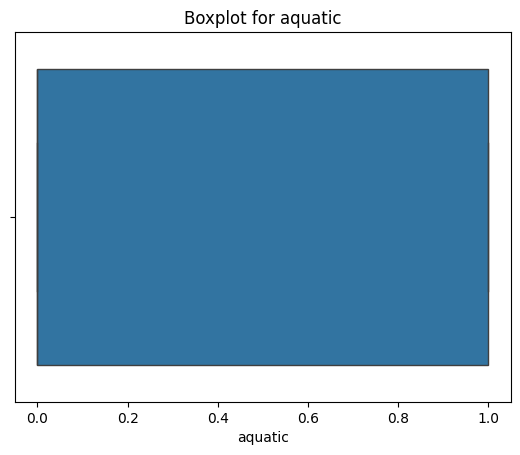

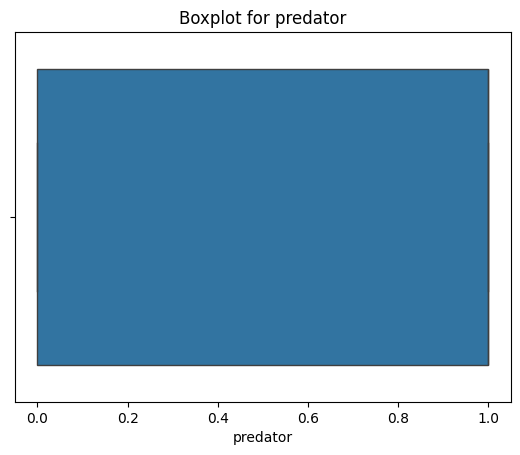

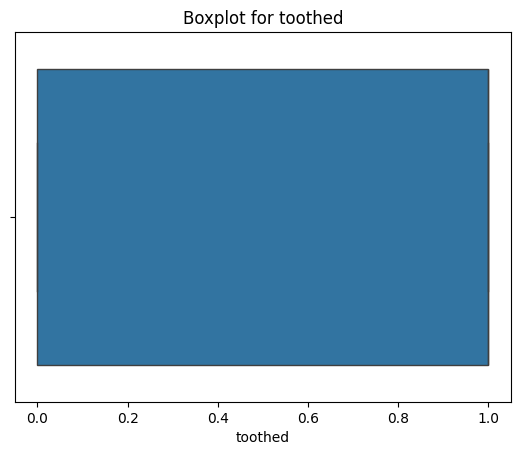

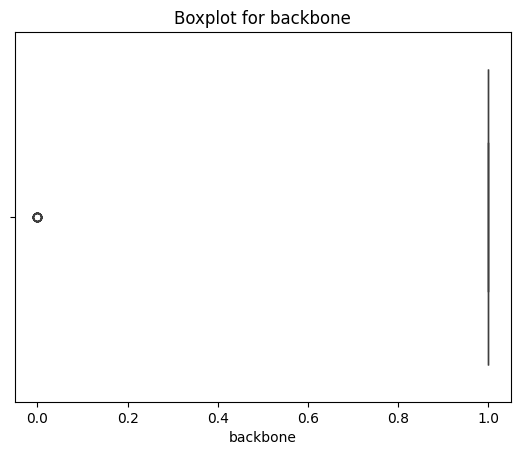

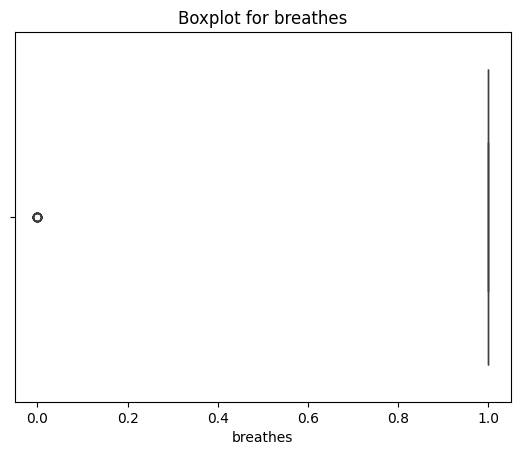

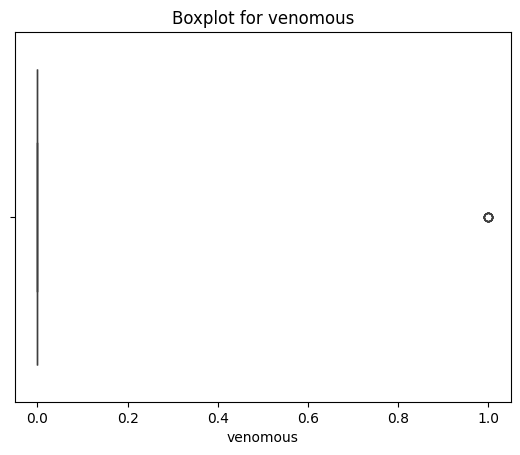

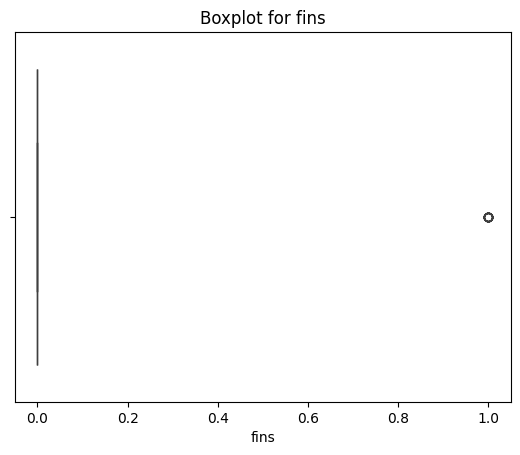

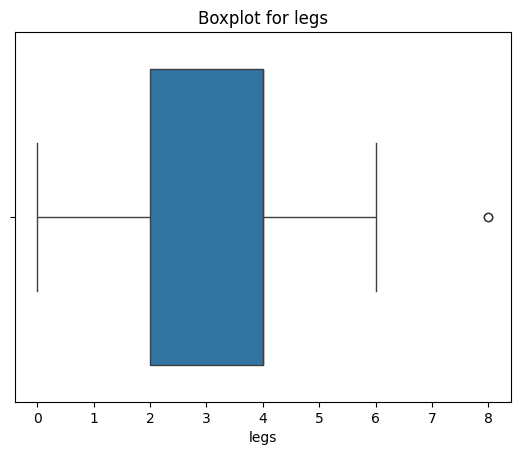

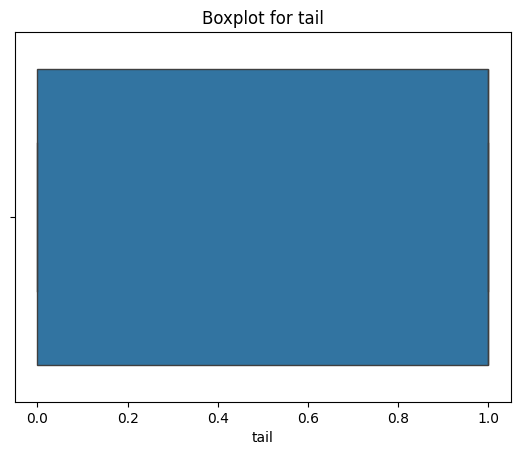

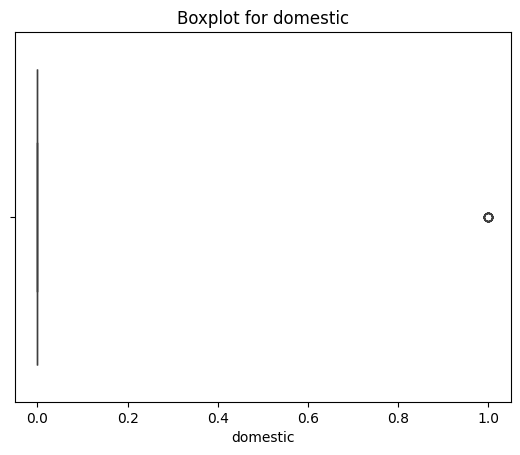

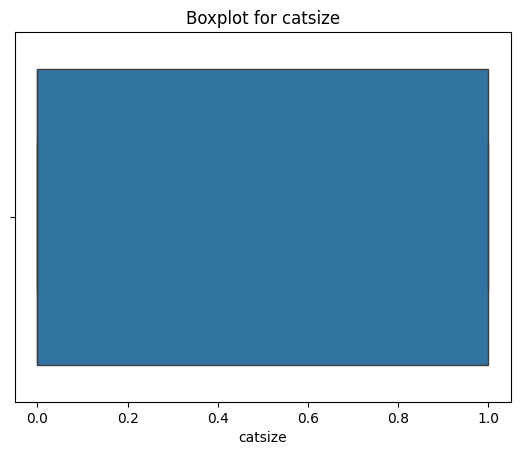

In [4]:
# Task 2: Preprocess the data
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Handle missing values if any (No missing values in this dataset)

# Handle outliers (Example: Visualize and check numerical features)
for column in data.columns[1:-1]:  # Exclude 'animal name' and 'type'
    plt.figure()
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

# Drop 'animal name' as it is not a feature
data.drop('animal name', axis=1, inplace=True)

# Separate features and target
X = data.drop('type', axis=1)
y = data['type']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [5]:
# Task 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [6]:
# Task 4: Implement KNN
# Choosing K and distance metric
k = 5  # Example value for K
knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)  # Minkowski distance with p=2 is Euclidean
knn_model.fit(X_train, y_train)



KNeighborsClassifier()

In [7]:
# Task 5: Evaluate the classifier
# Predictions
y_pred = knn_model.predict(X_test)

# Evaluation metrics
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))



KNN Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
# Task 6: Visualize decision boundaries (for 2D feature representation)
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


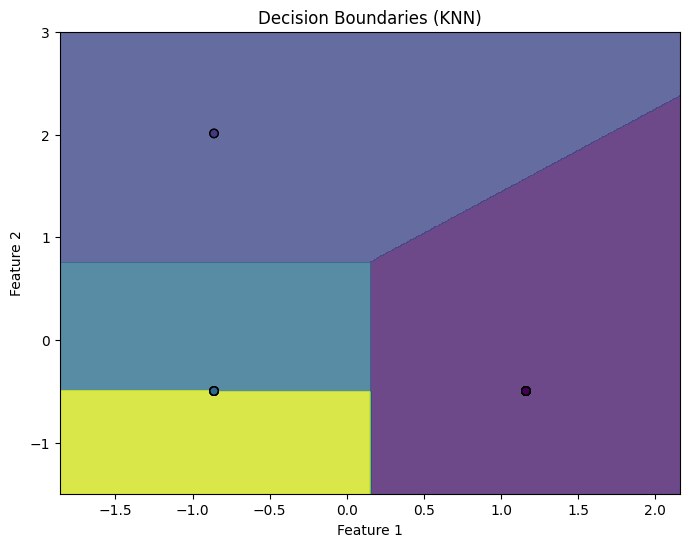

In [9]:

# Visualize using two features for simplicity (e.g., 'hair' and 'feathers')
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]
knn_model_2d = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
knn_model_2d.fit(X_train_2d, y_train)
plot_decision_boundaries(X_test_2d, y_test, knn_model_2d, "Decision Boundaries (KNN)")



In [10]:
# Interview Questions
print("1. What are the key hyperparameters in KNN?")
print("Key hyperparameters include the number of neighbors (K), distance metric (e.g., Euclidean, Manhattan), and weight function (uniform or distance-based).")
print("******************************************************************************************************")
print("2. What distance metrics can be used in KNN?")
print("Common distance metrics include:")
print("- Euclidean (L2 norm): sqrt(sum((x_i - y_i)^2))")
print("- Manhattan (L1 norm): sum(|x_i - y_i|)")
print("- Minkowski: Generalized metric controlled by parameter p")
print("- Hamming: For categorical variables.")

1. What are the key hyperparameters in KNN?
Key hyperparameters include the number of neighbors (K), distance metric (e.g., Euclidean, Manhattan), and weight function (uniform or distance-based).
******************************************************************************************************
2. What distance metrics can be used in KNN?
Common distance metrics include:
- Euclidean (L2 norm): sqrt(sum((x_i - y_i)^2))
- Manhattan (L1 norm): sum(|x_i - y_i|)
- Minkowski: Generalized metric controlled by parameter p
- Hamming: For categorical variables.
